# EDA

<AxesSubplot:ylabel='Density'>

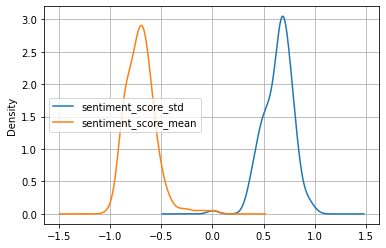

In [1]:
from data_fetcher import TweetGenerator, ReturnFactorsGenerator, Dataset
from config import load_config
import pandas as pd
from utils import DataMode


pd.set_option("display.max_rows", None, "display.max_columns", None) 
configuration = load_config(0)

a = TweetGenerator(configuration, pre_process=False)
a.data[["sentiment_score_std", "sentiment_score_mean"]].plot(grid=True,  kind="kde")

6938


returns        0.024338
log_returns    0.024419
dtype: float64

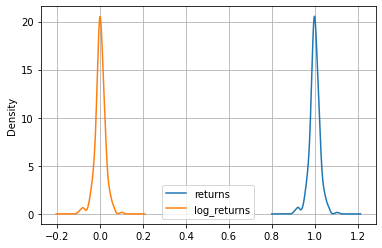

In [2]:
b = ReturnFactorsGenerator(configuration, True)
b.data[['returns', "log_returns"]].plot(grid=True,  kind="kde")
b.data[['returns', "log_returns"]].std()

In [3]:
c = Dataset(DataMode.TRAINING, configuration)
c.data.head()

6938


,period,date,sentiment_score_mean,sentiment_score_std,sentiment_score_mean_n_1,sentiment_score_mean_n_2,sentiment_score_mean_n_3,Close,returns,log_returns,log_returns_n_1,log_returns_n_2,log_returns_n_3,signal_macd,signal_macd_n_1,signal_macd_n_2,signal_macd_n_3,rsi,rsi_n_1,rsi_n_2,rsi_n_3
0,0.0,2021-02-06 12:00:00+00:00,-0.646777,0.715933,-0.819907,-0.706001,-0.782114,40139.726237,1.019475,0.019288,0.037872,0.014927,0.003287,715.288226,587.985835,478.384597,388.430762,1.000000,1.000000,0.556746,0.623606
1,0.0,2021-02-07 00:00:00+00:00,-0.901762,0.392499,-0.646777,-0.819907,-0.706001,38952.670573,0.969526,-0.030948,0.019288,0.037872,0.014927,826.442888,715.288226,587.985835,478.384597,0.659668,1.000000,1.000000,0.556746
2,0.0,2021-02-07 12:00:00+00:00,-0.886113,0.431189,-0.901762,-0.646777,-0.819907,38390.506836,0.985357,-0.014752,-0.030948,0.019288,0.037872,910.796930,826.442888,715.288226,587.985835,0.308871,0.659668,1.000000,1.000000
3,0.0,2021-02-08 00:00:00+00:00,-0.890640,0.418245,-0.886113,-0.901762,-0.646777,38834.540690,1.011434,0.011369,-0.014752,-0.030948,0.019288,978.939296,910.796930,826.442888,715.288226,0.202453,0.308871,0.659668,1.000000
4,0.0,2021-02-08 12:00:00+00:00,-0.576676,0.788973,-0.890640,-0.886113,-0.901762,43653.911458,1.110400,0.104720,0.011369,-0.014752,-0.030948,1108.007406,978.939296,910.796930,826.442888,0.903501,0.202453,0.308871,0.659668


                            OLS Regression Results                            
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.723
Date:                Wed, 05 Jan 2022   Prob (F-statistic):             0.0635
Time:                        14:57:40   Log-Likelihood:                 329.60
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:                  HC0                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

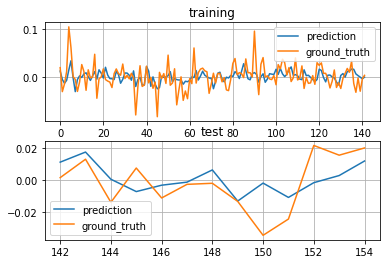

In [4]:
from models.linear_regression import LinearRegression



m = LinearRegression(generator = c, cfg = configuration)
m.train()
m.plot()

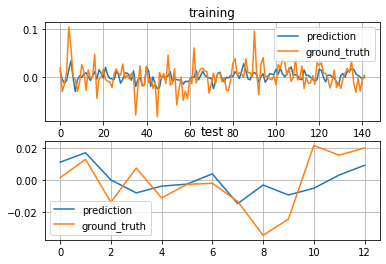

In [4]:
from models.rolling_OLS import RollingLinearRegression



m = RollingLinearRegression(generator = c, cfg = configuration)
m.train()
m.plot()

In [4]:
from models.LSTM import LSTM



m = LSTM(generator = c, cfg = configuration)
#m.train()
#m.plot()

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: <data_fetcher.Dataset object at 0x0000015D603129A0>

In [9]:
for i in m.generator.X_test.index:
    print(i)

142
143
144
145
146
147
148
149
150
151
152
153
154


In [5]:
m.generator.data[m.generator.features]

,sentiment_score_std,sentiment_score_mean_n_1,sentiment_score_mean_n_2,sentiment_score_mean_n_3,log_returns_n_1,log_returns_n_2,log_returns_n_3,signal_macd_n_1,signal_macd_n_2,signal_macd_n_3,rsi_n_1,rsi_n_2,rsi_n_3
0,0.715933,-0.819907,-0.706001,-0.782114,0.037872,0.014927,0.003287,587.985835,478.384597,388.430762,1.000000,0.556746,0.623606
1,0.392499,-0.646777,-0.819907,-0.706001,0.019288,0.037872,0.014927,715.288226,587.985835,478.384597,1.000000,1.000000,0.556746
2,0.431189,-0.901762,-0.646777,-0.819907,-0.030948,0.019288,0.037872,826.442888,715.288226,587.985835,0.659668,1.000000,1.000000
3,0.418245,-0.886113,-0.901762,-0.646777,-0.014752,-0.030948,0.019288,910.796930,826.442888,715.288226,0.308871,0.659668,1.000000
4,0.788973,-0.890640,-0.886113,-0.901762,0.011369,-0.014752,-0.030948,978.939296,910.796930,826.442888,0.202453,0.308871,0.659668
5,0.927880,-0.576676,-0.890640,-0.886113,0.104720,0.011369,-0.014752,1108.007406,978.939296,910.796930,0.903501,0.202453,0.308871
6,0.582806,-0.235340,-0.576676,-0.890640,0.061436,0.104720,0.011369,1313.086896,1108.007406,978.939296,1.000000,0.903501,0.202453
7,0.401433,-0.750364,-0.235340,-0.576676,0.000558,0.061436,0.104720,1552.480429,1313.086896,1108.007406,1.000000,1.000000,0.903501
8,0.513718,-0.892142,-0.750364,-0.235340,-0.005408,0.000558,0.061436,1793.302060,1552.480429,1313.086896,0.922529,1.000000,1.000000
9,0.485166,-0.858985,-0.858985,-0.858985,-0.000175,-0.000658,0.001260,2717.682848,2612.543424,2480.717539,0.602614,0.987791,0.991897


In [7]:
import statsmodels.api as sm


a.data["date"] = pd.to_datetime(a.data["date"], utc=True)
final_data = a.data.reset_index().merge(b.data, on="date", how="inner")
print(final_data.shape, final_data.columns)
final_data.head()

(155, 22) Index(['period', 'level_1', 'date', 'sentiment_score_mean',
       'sentiment_score_std', 'sentiment_score_mean_n_1',
       'sentiment_score_mean_n_2', 'sentiment_score_mean_n_3', 'Close',
       'returns', 'log_returns', 'log_returns_n_1', 'log_returns_n_2',
       'log_returns_n_3', 'signal_macd', 'signal_macd_n_1', 'signal_macd_n_2',
       'signal_macd_n_3', 'rsi', 'rsi_n_1', 'rsi_n_2', 'rsi_n_3'],
      dtype='object')


,period,level_1,date,sentiment_score_mean,sentiment_score_std,sentiment_score_mean_n_1,sentiment_score_mean_n_2,sentiment_score_mean_n_3,Close,returns,log_returns,log_returns_n_1,log_returns_n_2,log_returns_n_3,signal_macd,signal_macd_n_1,signal_macd_n_2,signal_macd_n_3,rsi,rsi_n_1,rsi_n_2,rsi_n_3
0,0.0,0,2021-02-06 12:00:00+00:00,-0.646777,0.715933,-0.819907,-0.706001,-0.782114,40139.726237,1.019475,0.019288,0.037872,0.014927,0.003287,715.288226,587.985835,478.384597,388.430762,1.000000,1.000000,0.556746,0.623606
1,0.0,1,2021-02-07 00:00:00+00:00,-0.901762,0.392499,-0.646777,-0.819907,-0.706001,38952.670573,0.969526,-0.030948,0.019288,0.037872,0.014927,826.442888,715.288226,587.985835,478.384597,0.659668,1.000000,1.000000,0.556746
2,0.0,2,2021-02-07 12:00:00+00:00,-0.886113,0.431189,-0.901762,-0.646777,-0.819907,38390.506836,0.985357,-0.014752,-0.030948,0.019288,0.037872,910.796930,826.442888,715.288226,587.985835,0.308871,0.659668,1.000000,1.000000
3,0.0,3,2021-02-08 00:00:00+00:00,-0.890640,0.418245,-0.886113,-0.901762,-0.646777,38834.540690,1.011434,0.011369,-0.014752,-0.030948,0.019288,978.939296,910.796930,826.442888,715.288226,0.202453,0.308871,0.659668,1.000000
4,0.0,4,2021-02-08 12:00:00+00:00,-0.576676,0.788973,-0.890640,-0.886113,-0.901762,43653.911458,1.110400,0.104720,0.011369,-0.014752,-0.030948,1108.007406,978.939296,910.796930,826.442888,0.903501,0.202453,0.308871,0.659668


In [5]:
import numpy as np

np.where(final_data.isna())

(array([], dtype=int64), array([], dtype=int64))

In [6]:
final_data.columns

Index(['date', 'sentiment_score_mean', 'sentiment_score_std',
       'sentiment_score_mean_n_1', 'sentiment_score_mean_n_2',
       'sentiment_score_mean_n_3', 'Close', 'returns', 'log_returns',
       'log_returns_n_1', 'log_returns_n_2', 'log_returns_n_3', 'signal_macd',
       'signal_macd_n_1', 'signal_macd_n_2', 'signal_macd_n_3', 'rsi',
       'rsi_n_1', 'rsi_n_2', 'rsi_n_3', 'distance_to_bollinger_low',
       'distance_to_bollinger_high', 'distance_to_bollinger_low_n_1',
       'distance_to_bollinger_low_n_2', 'distance_to_bollinger_low_n_3',
       'distance_to_bollinger_high_n_1', 'distance_to_bollinger_high_n_2',
       'distance_to_bollinger_high_n_3'],
      dtype='object')

                            OLS Regression Results                            
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.921
Date:                Tue, 04 Jan 2022   Prob (F-statistic):             0.0333
Time:                        14:31:00   Log-Likelihood:                 329.60
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

([], [])

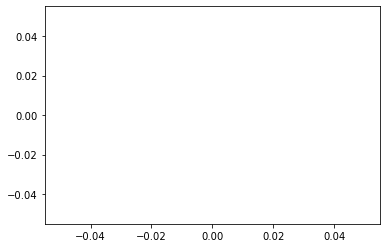

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

def rmse(y_pred, y_test):
       return np.sqrt(np.sum(((y_pred - y_test))**2))


X = final_data[final_data.period == 0.0][["sentiment_score_std", "sentiment_score_mean_n_1", "sentiment_score_mean_n_2", 'sentiment_score_mean_n_3', "log_returns_n_1", 'log_returns_n_2', 'log_returns_n_3',
       'signal_macd_n_1', 'signal_macd_n_2', 'signal_macd_n_3', 
       'rsi_n_1', 'rsi_n_2', 'rsi_n_3']]
y = final_data[final_data.period == 0.0]["log_returns"]
x_test = final_data[final_data.period > 0.0][["sentiment_score_std", "sentiment_score_mean_n_1", "sentiment_score_mean_n_2", 'sentiment_score_mean_n_3', "log_returns_n_1", 'log_returns_n_2', 'log_returns_n_3',
       'signal_macd_n_1', 'signal_macd_n_2', 'signal_macd_n_3', 
       'rsi_n_1', 'rsi_n_2', 'rsi_n_3']]
y_test = final_data[final_data.period > 0.0]["log_returns"]
l =[]
l_train = []
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()#_regularized(maxiter=1000, alpha=0.0001, L1_wt=0.3)
print(res.summary())
model = sm.GLS(y, X)
res_ = model.fit()#_regularized(maxiter=1000, alpha=0.0001, L1_wt=0.3)
print(res_.summary())
#krr = LinearRegression()
#krr.fit(X, y)
#l.append(rmse(krr.predict(x_test), y_test))
#l_train.append(rmse(krr.predict(X), y))
#l.append(krr.score(x_test, y_test))
#l_train.append(krr.score(X, y))

plt.plot(l)
plt.plot(l_train)
l, l_train

<AxesSubplot:>

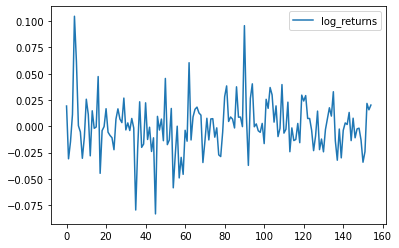

In [9]:
#krr = LinearRegression()
#krr.fit(X, y)
final_data[["log_returns"]].plot()
#plt.plot(krr.predict(pd.concat([X, x_test])))


In [111]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
res = model.fit()#_regularized(maxiter=1000, alpha=0.0001, L1_wt=0.3)
res.summary()#, model.score(sm.add_constant(x_test))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_returns   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.921
Date:                Wed, 22 Dec 2021   Prob (F-statistic):             0.0333
Time:                        20:22:14   Log-Likelihood:                 329.60
No. Observations:                 142   AIC:                            -631.2
Df Residuals:                     128   BIC:                            -589.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0643      0.021     -3.135      0.002      -0.105      -0.024
sentiment_score_std          0.0543      0.017      3.146      0.002       0.020       0.088
sentiment_score_mean_n_1     0.0144      0.015      0.953      0.342      -0.015       0.044
sentiment_score_mean_n_2    -0.0258      0.015     -1.768      0.079      -0.055       0.003
sentiment_score_mean_n_3    -0.0173      0.015     -1.188      0.237      -0.046       0.011
log_returns_n_1             -0.1012      0.274     -0.369      0.713      -0.644       0.441
log_returns_n_2             -0.2318      0.188     -1.233      0.220      -0.604       0.140
log_returns_n_3             -0.1004      0.144     -0.698      0.487      -0.385       0.184
signal_macd_n_1              0.0001      0.000      0.401      0.689      -0.001       0.001
signal_macd_n_2             -0.0003      0.001     -0.386      0.700      -0.002       0.001
signal_macd_n_3              0.0001      0.000      0.370      0.712      -0.001       0.001
rsi_n_1                      0.0199      0.013      1.504      0.135      -0.006       0.046
rsi_n_2                      0.0004      0.012      0.037      0.971      -0.024       0.025
rsi_n_3                     -0.0004      0.011     -0.041      0.967      -0.021       0.020
==============================================================================
Omnibus:                       14.755   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.078
Skew:                           0.513   Prob(JB):                     5.91e-06
Kurtosis:                       4.737   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

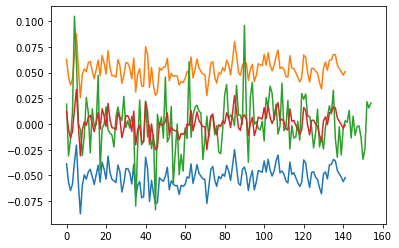

In [112]:
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
plt.plot(iv_l)
plt.plot(iv_u)
final_data["log_returns"].plot()
plt.plot(res.predict())
res.summary()

In [63]:
res.params

const                      -0.053315
sentiment_score_std         0.049469
sentiment_score_mean_n_1    0.013866
sentiment_score_mean_n_2   -0.030773
log_returns_n_1            -0.053196
log_returns_n_2            -0.220307
log_returns_n_3            -0.100581
signal_macd_n_1             0.000105
signal_macd_n_2            -0.000186
signal_macd_n_3             0.000083
rsi_n_1                     0.019503
rsi_n_2                     0.000286
rsi_n_3                     0.000488
dtype: float64

In [25]:
X = final_data[final_data.period == 0.0][["sentiment_score_std", "sentiment_score_mean", "log_returns", 
       'signal_macd', 
       'rsi']]
y = final_data[final_data.period == 0.0]["log_returns"]
x_test = final_data[final_data.period > 0.0][["sentiment_score_std", "sentiment_score_mean", "log_returns", 
       'signal_macd', 
       'rsi']]
y_test = final_data[final_data.period > 0.0]["log_returns"]
mod = sm.tsa.VARMAX(X, order=(3,0))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                                                            Statespace Model Results                                                            
Dep. Variable:     ['sentiment_score_std', 'sentiment_score_mean', 'log_returns', 'signal_macd', 'rsi']   No. Observations:                  142
Model:                                                                                           VAR(3)   Log Likelihood                -380.491
                                                                                            + intercept   AIC                            950.983
Date:                                                                                  Tue, 04 Jan 2022   BIC                           1231.786
Time:                                                                                          19:46:37   HQIC                          1065.090
Sample:                                                                                               0                           

In [ ]:
res.predict().shape

(155, 4)

0.2938458791082506

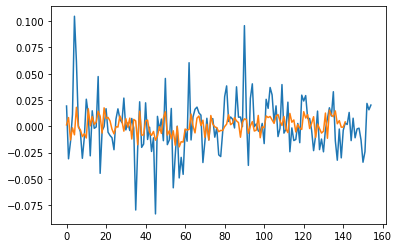

In [26]:
import matplotlib.pyplot as plt
import numpy as np
def rmse(y_pred, y_test):
       return np.sqrt(np.sum(((y_pred - y_test))**2))





final_data["log_returns"].plot()
plt.plot(res.predict().log_returns)

rmse(res.predict().log_returns, y)
#rmse(res.predict(x_test), y_test)

In [65]:
import matplotlib.pyplot as plt

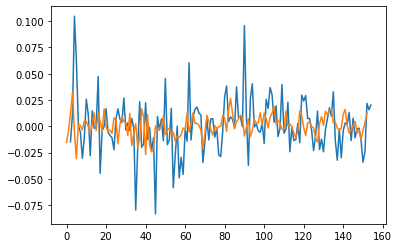

In [66]:
final_data["log_returns"].plot()
plt.plot(res.predict())

In [67]:
(res.predict() >= 0)

array([False, False,  True,  True, False, False,  True,  True, False,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False,  True,  True, False, False,  True,  True, False, False,
       False, False,

In [68]:
np.mean((res.predict() >= 0) == (final_data["log_returns"] > 0).values)

0.5555555555555556

In [14]:
model.score(res.params)

array([-1.16385300e+02, -3.66827954e+01,  3.14150555e+01,  2.05630832e+01,
        4.72910638e+00, -9.78218918e-02, -2.23523518e-01,  2.53350622e-01,
        1.34156444e+04,  5.16454996e+03, -2.26672783e+03, -1.47438178e-01,
        4.72325630e-01,  1.52004938e-01,  2.87574764e-03, -4.19304419e-01,
        2.52535289e-14])

In [9]:
res.params

const                      -0.026040
sentiment_score_std         0.038919
sentiment_score_mean_n_1    0.020343
sentiment_score_mean_n_2   -0.019673
sentiment_score_mean_n_3   -0.003247
log_returns_n_1             0.158259
log_returns_n_2            -0.065454
log_returns_n_3             0.092865
dtype: float64

In [3]:
from datetime import datetime 
f = (datetime.strptime("2021-05-31 01:00:00", "%Y-%m-%d %H:%M:%S") - datetime.strptime("2021-06-06 23:00:00", "%Y-%m-%d %H:%M:%S"))
f.days * 24 + f.seconds//3600

-166

In [13]:
def _time_travel(df):
        #print(df.columns)
        new_df = df.iloc[3:].copy()
        for i in range(1, 3+1):
            #print(df.iloc[(3-i):-i].loc[:, ('sentiment_score', 'mean')].tolist()[:3])
            new_df.loc[:, ('sentiment_score', 'mean_n_'+str(i))] =  df.iloc[(3-i):-i].loc[:, ('sentiment_score', 'mean')].tolist()
        return new_df.reset_index(drop=True)

_time_travel(a.data).head(10), a.data.head(10)

MultiIndex([(           'date',         ''),
            ('sentiment_score',     'mean'),
            ('sentiment_score',      'std'),
            ('sentiment_score', 'mean_n_1'),
            ('sentiment_score', 'mean_n_2'),
            ('sentiment_score', 'mean_n_3')],
           )


AttributeError: 'list' object has no attribute 'head'

In [9]:
import pandas as pd


f = pd.read_csv(a.path_preprocessed, index_col=[0, 1], header = [0,1])
f


date sentiment_score                                \
             Unnamed: 2_level_1            mean       std  mean_n_1  mean_n_2   
period                                                                          
0.0    0    2021-02-06 12:00:00       -0.992678       NaN -0.992678 -0.992678   
       1    2021-02-07 00:00:00             NaN       NaN       NaN       NaN   
       2    2021-02-07 12:00:00             NaN       NaN       NaN       NaN   
       3    2021-02-08 00:00:00       -0.993056       NaN -0.993056 -0.993056   
       4    2021-02-08 12:00:00       -0.328289  1.024619 -0.328289 -0.328289   
       5    2021-02-09 00:00:00       -0.019481  1.368857 -0.019481 -0.019481   
       6    2021-02-09 12:00:00        0.009785  1.395352  0.009785  0.009785   
       7    2021-02-10 00:00:00             NaN       NaN       NaN       NaN   
       8    2021-02-10 12:00:00       -0.987080       NaN -0.987080 -0.987080   
       9    2021-02-11 00:00:00             NaN       NaN       NaN       NaN   
       10   2021-02-11 12:00:00             NaN       NaN       NaN       NaN   
       11   2021-02-12 00:00:00             NaN       NaN       NaN       NaN   
       12   2021-02-12 12:00:00             NaN       NaN       NaN       NaN   
       13   2021-02-13 00:00:00             NaN       NaN       NaN       NaN   
       14   2021-02-13 12:00:00       -0.988005       NaN -0.988005 -0.988005   
       15   2021-02-14 00:00:00       -0.991562       NaN -0.991562 -0.991562   
       16   2021-02-14 12:00:00       -0.682359       NaN -0.682359 -0.682359   
       17   2021-02-15 00:00:00             NaN       NaN       NaN       NaN   
       18   2021-02-15 12:00:00       -0.991303  0.009635 -0.991303 -0.991303   
       19   2021-02-16 00:00:00             NaN       NaN       NaN       NaN   
       20   2021-02-16 12:00:00             NaN       NaN       NaN       NaN   
       21   2021-02-17 00:00:00             NaN       NaN       NaN       NaN   
       22   2021-02-17 12:00:00             NaN       NaN       NaN       NaN   
       23   2021-02-18 00:00:00       -0.977836       NaN -0.977836 -0.977836   
       24   2021-02-18 12:00:00       -0.994885       NaN -0.994885 -0.994885   
       25   2021-02-19 00:00:00       -0.998425       NaN -0.998425 -0.998425   
       26   2021-02-19 12:00:00       -0.031329  1.112798 -0.031329 -0.031329   
       27   2021-02-20 00:00:00             NaN       NaN       NaN       NaN   
       28   2021-02-20 12:00:00             NaN       NaN       NaN       NaN   
       29   2021-02-21 00:00:00             NaN       NaN       NaN       NaN   
       30   2021-02-21 12:00:00             NaN       NaN       NaN       NaN   
       31   2021-02-22 00:00:00             NaN       NaN       NaN       NaN   
       32   2021-02-22 12:00:00       -0.988630       NaN -0.988630 -0.988630   
       33   2021-02-23 00:00:00             NaN       NaN       NaN       NaN   
       34   2021-02-23 12:00:00             NaN       NaN       NaN       NaN   
       35   2021-02-24 00:00:00             NaN       NaN       NaN       NaN   
       36   2021-02-24 12:00:00             NaN       NaN       NaN       NaN   
       37   2021-02-25 00:00:00             NaN       NaN       NaN       NaN   
       38   2021-02-25 12:00:00             NaN       NaN       NaN       NaN   
       39   2021-02-26 00:00:00             NaN       NaN       NaN       NaN   
       40   2021-02-26 12:00:00             NaN       NaN       NaN       NaN   
       41   2021-02-27 00:00:00             NaN       NaN       NaN       NaN   
       42   2021-02-27 12:00:00             NaN       NaN       NaN       NaN   
       43   2021-02-28 00:00:00             NaN       NaN       NaN       NaN   
       44   2021-02-28 12:00:00       -0.966089       NaN -0.966089 -0.966089   
       45   2021-03-01 00:00:00             NaN       NaN       NaN       NaN   
       46   2021-03-01 12:00:00             NaN       NaN 

In [12]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

In [13]:
a.data.sample(5)

date sentiment_score          
                                         mean       std
period                                                 
0.0    19 2021-10-27 12:00:00       -0.290354  0.981466
1.0    29 2021-11-18 12:00:00       -0.667812  0.765163
       13 2021-11-10 12:00:00             NaN       NaN
       40 2021-11-24 00:00:00             NaN       NaN
       7  2021-11-07 12:00:00             NaN       NaN

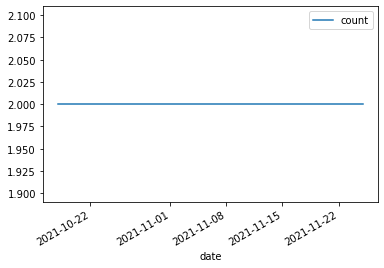

In [14]:
import pandas as pd

t = pd.to_datetime(a.data['date'], errors="coerce", infer_datetime_format=True).dt.floor("d").value_counts().rename_axis('date').reset_index(name='count')
t.plot(x="date", y="count")

In [15]:
t

,date,count
0,2021-10-25,2
1,2021-11-10,2
2,2021-11-12,2
3,2021-10-24,2
4,2021-11-24,2
5,2021-11-05,2
6,2021-11-17,2
7,2021-10-29,2
8,2021-10-22,2
9,2021-11-25,2


In [16]:
t.date.min(), t.date.max()

(Timestamp('2021-10-18 00:00:00'), Timestamp('2021-11-25 00:00:00'))

2


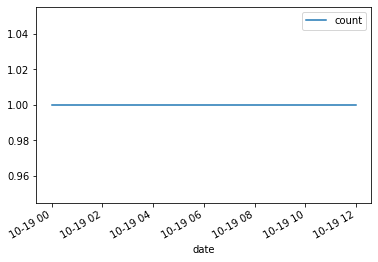

In [17]:
f = a.data[(a.data["date"] >= "2021-10-19 00:00:00") & (a.data["date"] < "2021-10-20 00:00:00")]
print(len(f))
pd.to_datetime(f['date'], errors="coerce", infer_datetime_format=True).dt.floor("h").value_counts().rename_axis('date').reset_index(name='count').plot(x="date", y="count", )

In [18]:
list(range(0, 750, 256))

[0, 256, 512]